In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%pip install jupysql --upgrade duckdb-engine pandas --quiet

Note: you may need to restart the kernel to use updated packages.


In [3]:
%reload_ext sql

In [4]:
%sql duckdb:///../data/adidas.duckdb


Connecting to 'duckdb:///../data/adidas.duckdb'

In [5]:
%%sql
SELECT * FROM data_sales_adidas LIMIT 5

Running query in 'duckdb:///../data/adidas.duckdb'

Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.5,In-store
Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.3,In-store
Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.3,In-store


In [6]:
result = %sql SELECT * FROM data_sales_adidas
df = result.DataFrame()

Running query in 'duckdb:///../data/adidas.duckdb'

In [7]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


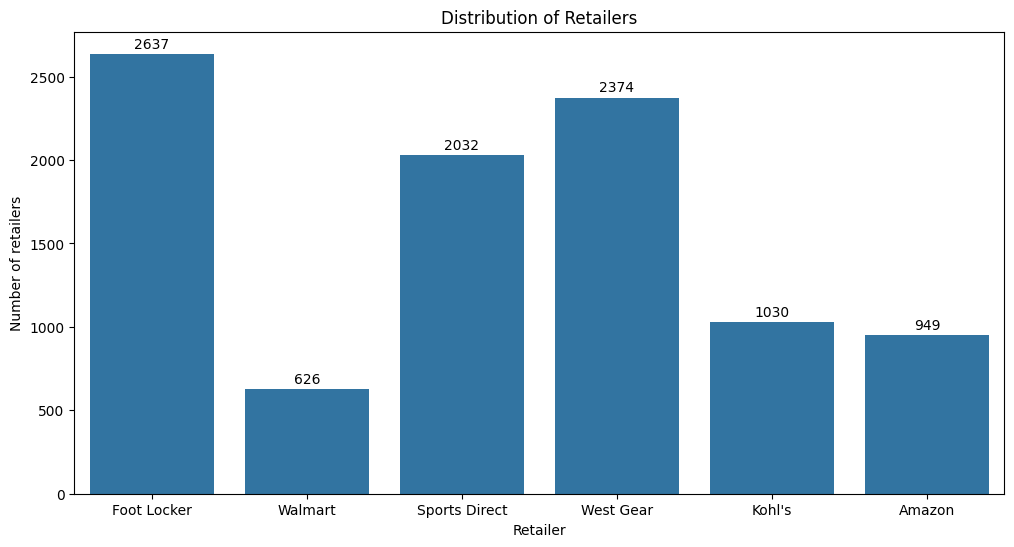

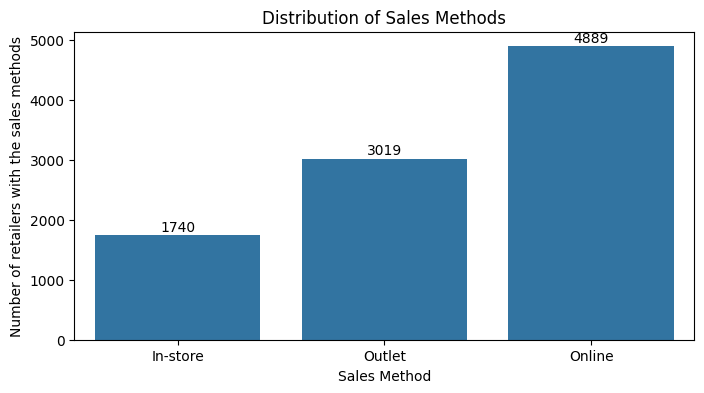

In [8]:
plt.figure(figsize=(12, 6))
ax1 = sns.countplot(x='Retailer', data=df)
plt.title('Distribution of Retailers')
plt.ylabel('Number of retailers')

# Adding counts on top of bars as integers
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 7), textcoords='offset points')

plt.show()

# Countplot for Sales Method
plt.figure(figsize=(8, 4))
ax2 = sns.countplot(x='Sales Method', data=df)
plt.title('Distribution of Sales Methods')
plt.ylabel('Number of retailers with the sales methods')

# Adding counts on top of bars as integers
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 6), textcoords='offset points')

plt.show()

In [9]:
#%sql duckdb:///../data/trends.duckdb

In [ ]:
#analysis of shopping_trends

In [10]:
%%sql
SELECT * FROM data_shopping_trends LIMIT 5

Running query in 'duckdb:///../data/adidas.duckdb'

Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [11]:
result_trends = %sql SELECT * FROM data_shopping_trends
df_trends = result_trends.DataFrame()

Running query in 'duckdb:///../data/adidas.duckdb'

In [12]:
df_trends.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


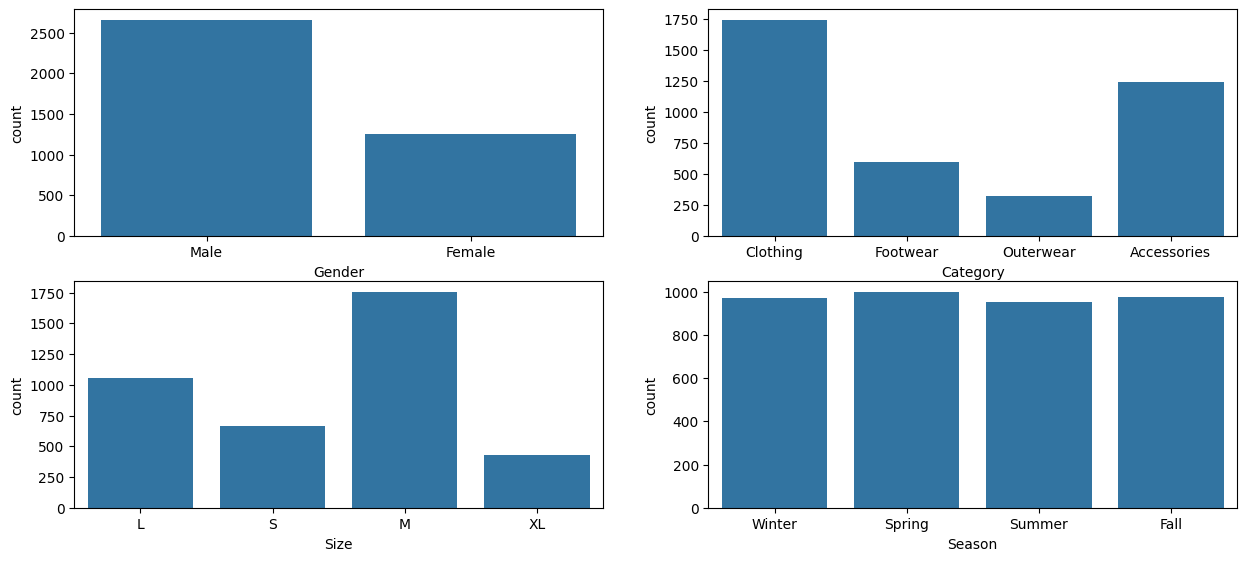

In [14]:
# 2. Categorical Variables
plt.figure(figsize=(15, 10))

#Number of Customers by gender
plt.subplot(3, 2, 1)
sns.countplot(x='Gender', data=df_trends)


#Number of products sold by category
plt.subplot(3, 2, 2)
sns.countplot(x='Category', data=df_trends)

#Number of products sold by size
plt.subplot(3, 2, 3)
sns.countplot(x='Size', data=df_trends)

#Number of products sold in the season
plt.subplot(3, 2, 4)
sns.countplot(x='Season', data=df_trends)

plt.show()

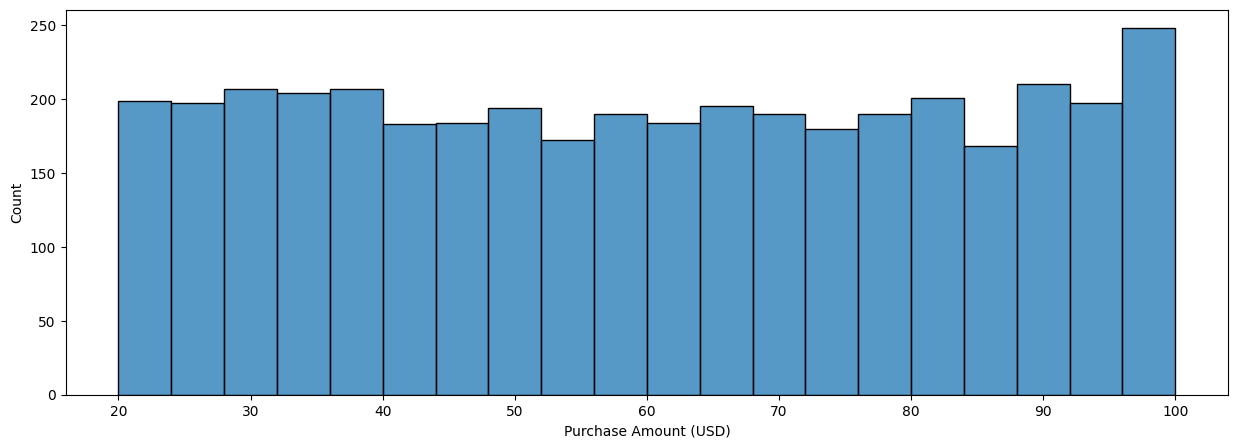

In [41]:
# 3. Purchase Behavior
plt.figure(figsize=(15, 5))

sns.histplot(df_trends['Purchase Amount (USD)'], bins=20)

plt.show()

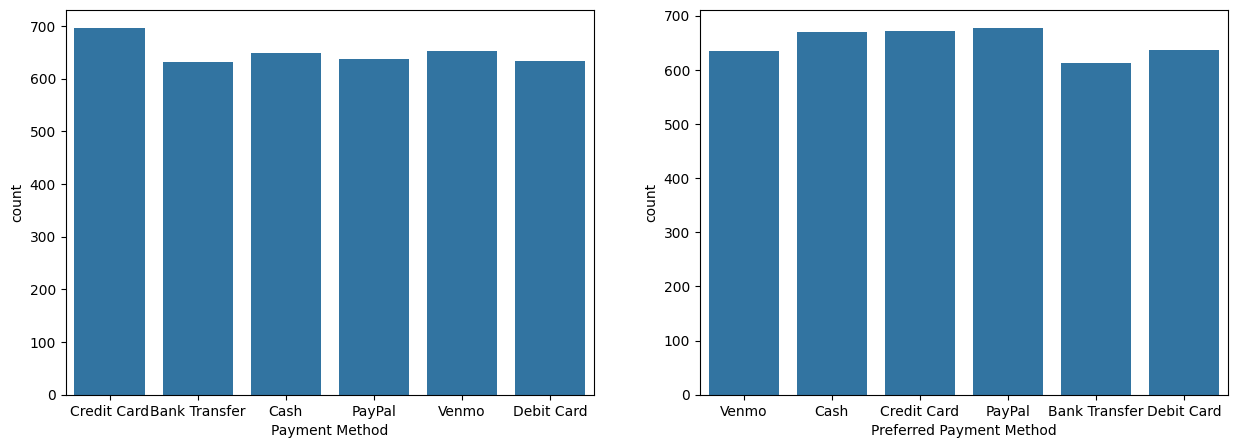

In [19]:
# 4. Payment Methods
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Payment Method', data=df_trends)

plt.subplot(1, 2, 2)
sns.countplot(x='Preferred Payment Method', data=df_trends)

plt.show()



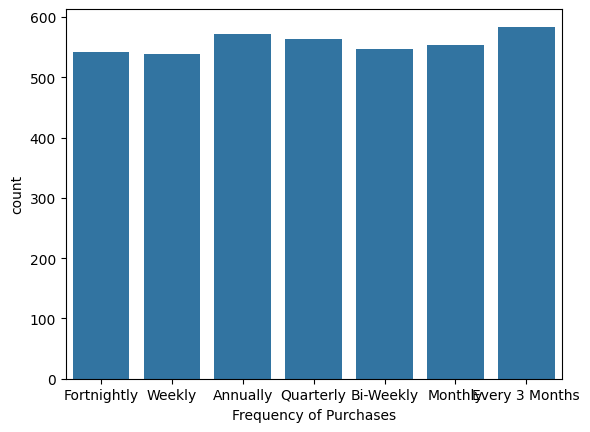

In [20]:
# 5. Frequency Analysis
sns.countplot(x='Frequency of Purchases', data=df_trends)
plt.show()



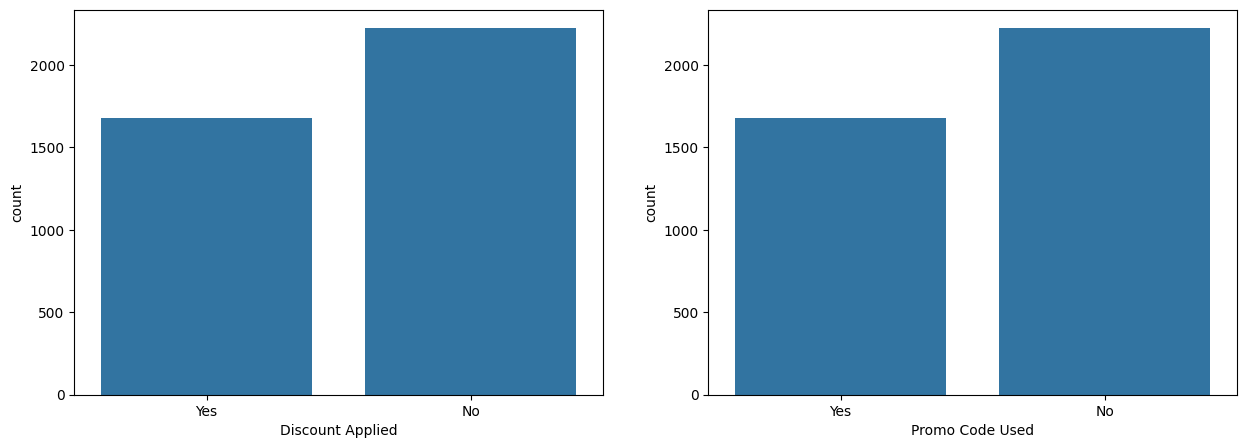

In [21]:
# 6. Discounts and Promotions
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Discount Applied', data=df_trends)

plt.subplot(1, 2, 2)
sns.countplot(x='Promo Code Used', data=df_trends)

plt.show()



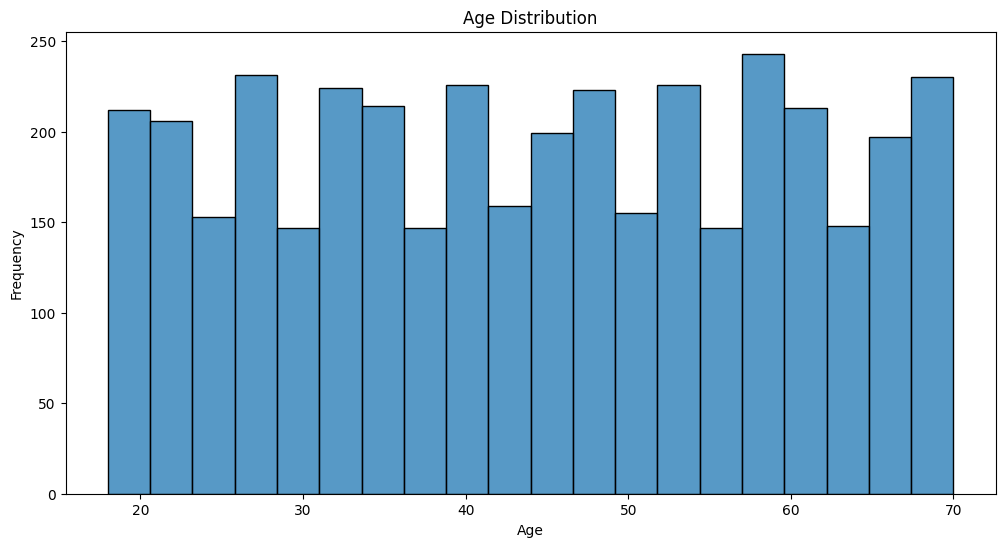

In [44]:
# Age Analysis
plt.figure(figsize=(12, 6))
sns.histplot(df_trends['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



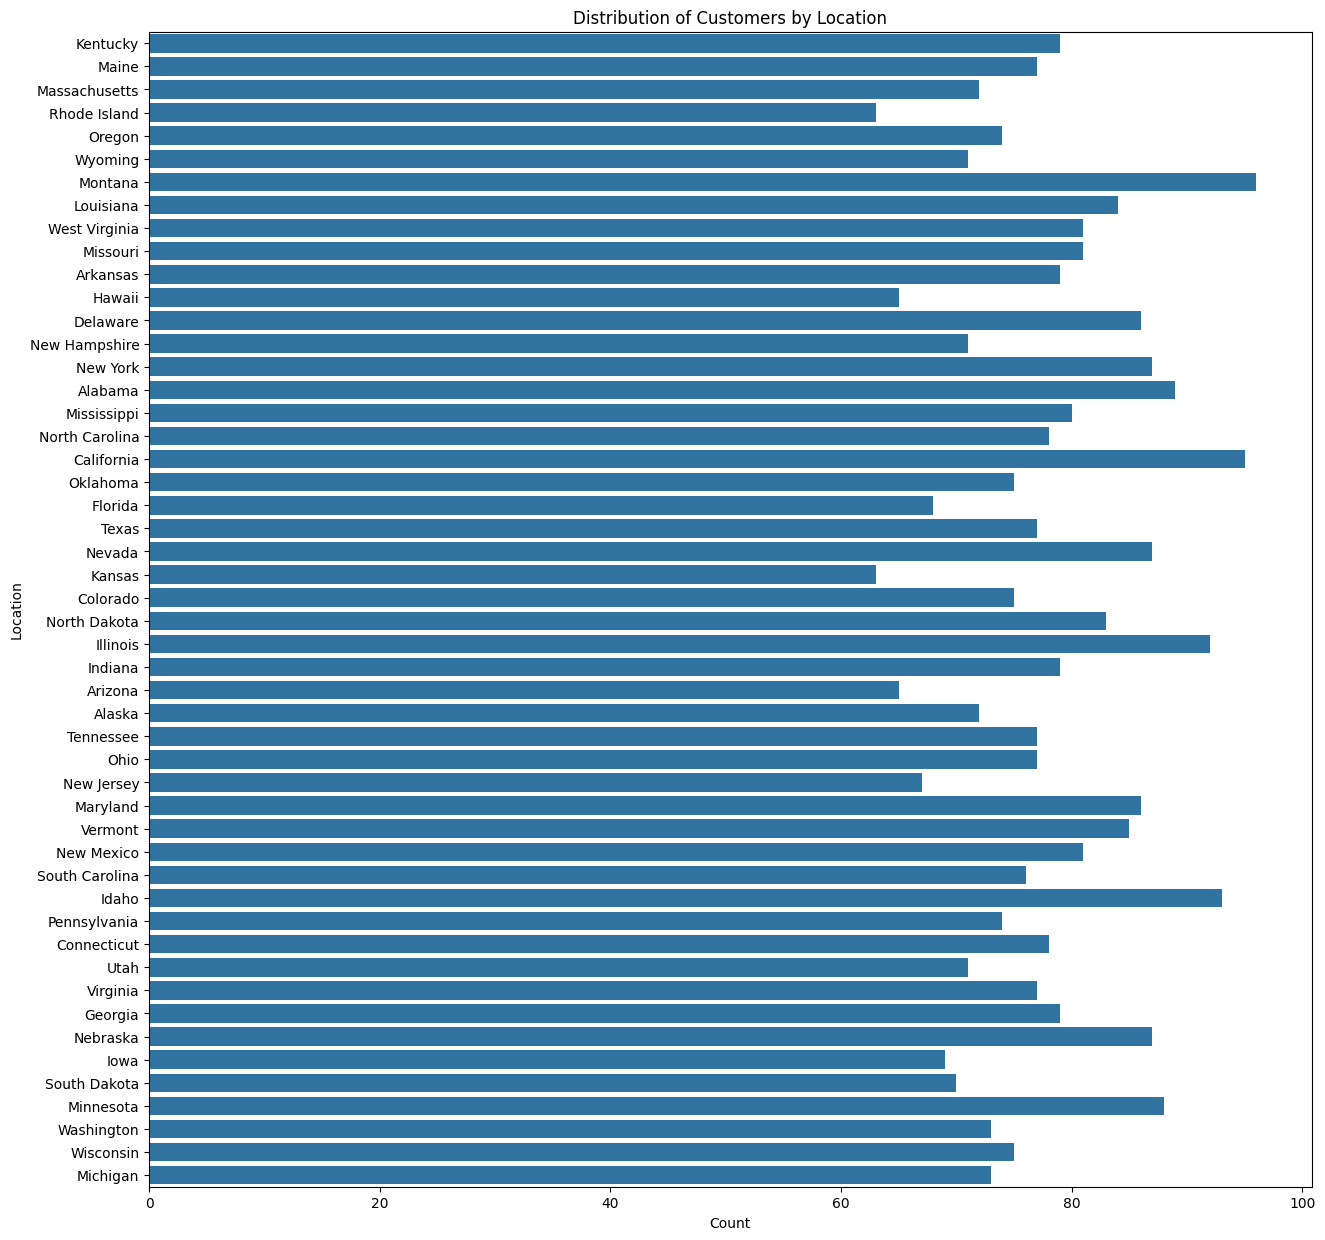

In [47]:
# 7. Geographical Analysis
plt.figure(figsize=(15,15))
sns.countplot(y='Location', data=df_trends)
plt.title('Distribution of Customers by Location')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

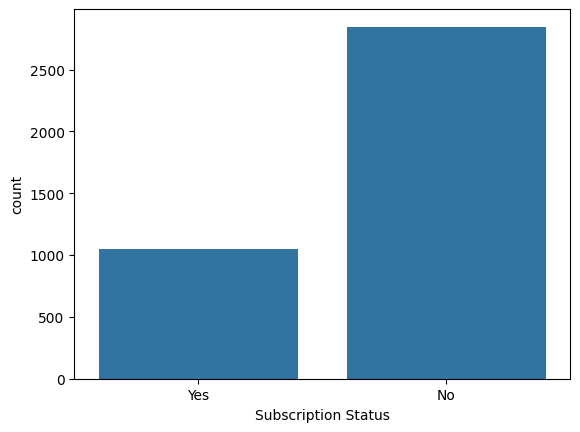

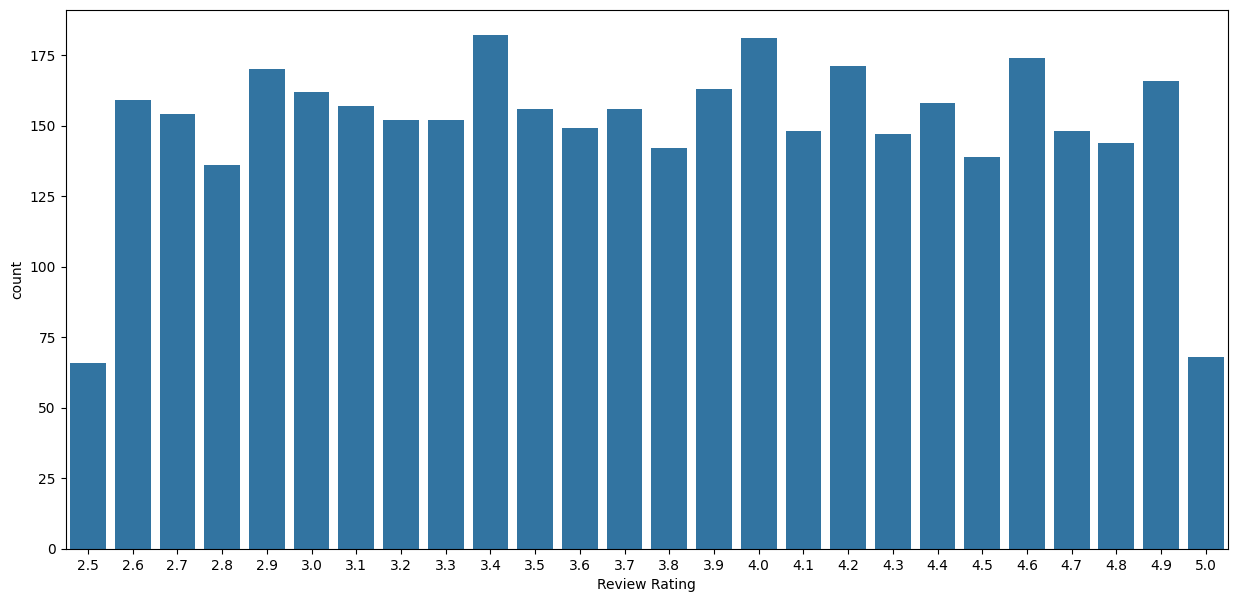

In [51]:
# 8. Subscription Analysis
sns.countplot(x='Subscription Status', data=df_trends)
plt.show()

plt.figure(figsize=(15,7))
# 8. Subscription Analysis
sns.countplot(x='Review Rating', data=df_trends)
plt.show()



In [29]:
# 9. Purchasing Frequency Analysis using Customer ID
customer_frequency = df_trends['Customer ID'].value_counts().reset_index()
customer_frequency.columns = ['Customer ID', 'Purchase Frequency']

# Sort the DataFrame by 'Purchase Frequency' in descending order
customer_frequency = customer_frequency.sort_values(by='Purchase Frequency', ascending=False)

# Display the sorted table
print(customer_frequency)

      Customer ID  Purchase Frequency
0               1                   1
2620           60                   1
2592           30                   1
2593           15                   1
2594            3                   1
...           ...                 ...
1304         3894                   1
1305         3895                   1
1306         3896                   1
1307         3897                   1
3899         3900                   1

[3900 rows x 2 columns]


In [32]:
# 9. Purchasing Frequency Analysis using Customer ID
customer_frequency = df_trends['Customer ID'].value_counts().reset_index()
customer_frequency.columns = ['Customer ID', 'Purchase Frequency']

# Filter customers who purchased more than once
repeat_customers = customer_frequency[customer_frequency['Purchase Frequency'] > 1]

# Sort the DataFrame by 'Purchase Frequency' in descending order
repeat_customers = repeat_customers.sort_values(by='Purchase Frequency', ascending=False)

# Display the table for repeat customers
print("Repeat Customers:")
print(repeat_customers)

# Calculate and print the sum of purchases for customers who bought only once
sum_single_purchases = customer_frequency[customer_frequency['Purchase Frequency'] == 1]['Purchase Frequency'].sum()
print("\nSum of Purchases for Customers who Bought Only Once:", sum_single_purchases)

#

Repeat Customers:
Empty DataFrame
Columns: [Customer ID, Purchase Frequency]
Index: []

Sum of Purchases for Customers who Bought Only Once: 3900
